<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Transforming_Taiwan_real_estate_variables_and_visualising_model_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [3]:
taiwan_real_estate = pd.read_csv('/content/taiwan_real_estate2.csv')
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


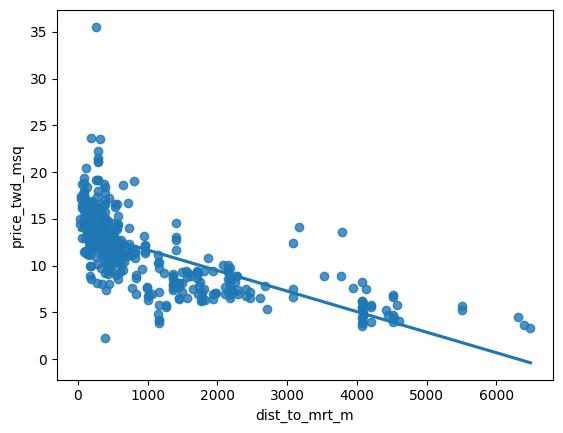

In [4]:
x = 'dist_to_mrt_m'
y ='price_twd_msq'

sns.regplot(x='dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate,ci=None)
plt.show()

The relationship is not linear, so I have to transform the variables using squarer root as its right skewed

In [5]:
taiwan_real_estate['dist_to_mrt_sqrt'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
0       84.87882             10        30 to 45      11.467474   
1      306.59470              9        15 to 30      12.768533   
2      561.98450              5         0 to 15      14.311649   
3      561.98450              5         0 to 15      16.580938   
4      390.56840              5         0 to 15      13.040847   

   dist_to_mrt_sqrt  
0          9.212970  
1         17.509846  
2         23.706212  
3         23.706212  
4         19.762803  


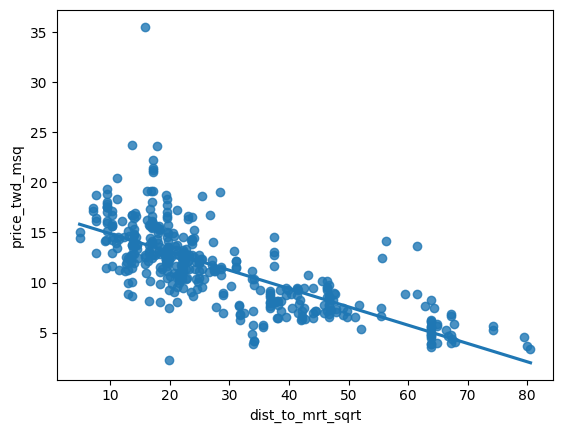

In [6]:
sns.regplot(x='dist_to_mrt_sqrt', y='price_twd_msq', data=taiwan_real_estate,ci=None)
plt.show()

In [7]:
#Fit in the data into the model

price_vs_dist = ols('price_twd_msq ~ dist_to_mrt_sqrt', data = taiwan_real_estate).fit()
print(price_vs_dist.params)

Intercept           16.709799
dist_to_mrt_sqrt    -0.182843
dtype: float64


In [8]:
#Prediction

explanatory_data = pd.DataFrame({'dist_to_mrt_sqrt': np.sqrt(np.arange(0, 81, 10) ** 2),
                                'dist_to_mrt_m': np.arange(0,81,10) ** 2})


prediction = explanatory_data.assign(price_twd_msq = price_vs_dist.predict(explanatory_data))
print(prediction.head())

   dist_to_mrt_sqrt  dist_to_mrt_m  price_twd_msq
0               0.0              0      16.709799
1              10.0            100      14.881370
2              20.0            400      13.052942
3              30.0            900      11.224513
4              40.0           1600       9.396085


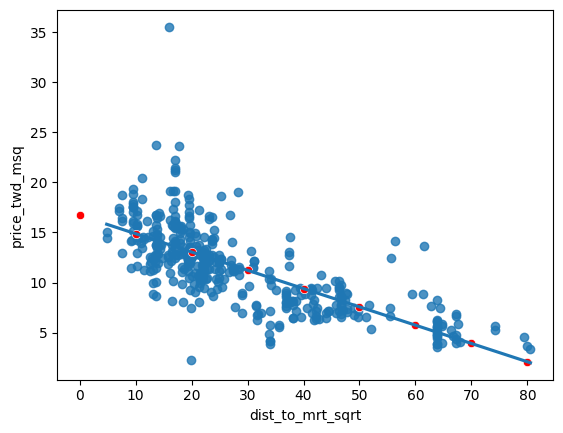

In [9]:
#Visualisation

fig =plt.figure()
sns.regplot(x='dist_to_mrt_sqrt', y='price_twd_msq', data=taiwan_real_estate,ci=None)
sns.scatterplot(x='dist_to_mrt_sqrt', y='price_twd_msq', data=prediction, color='red',marker='o')
plt.show()

# Visualizing model

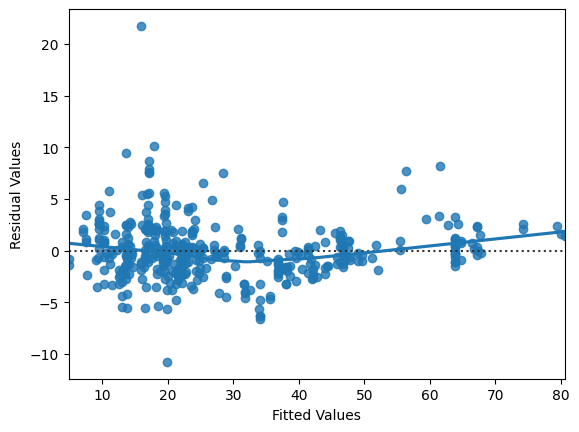

In [12]:
sns.residplot(x='dist_to_mrt_sqrt', y='price_twd_msq', data=taiwan_real_estate,lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

QQplot

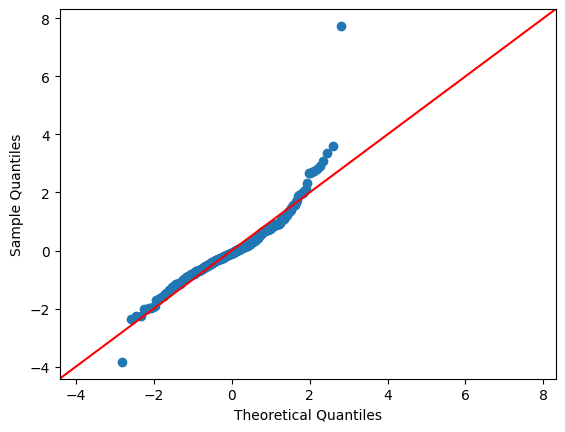

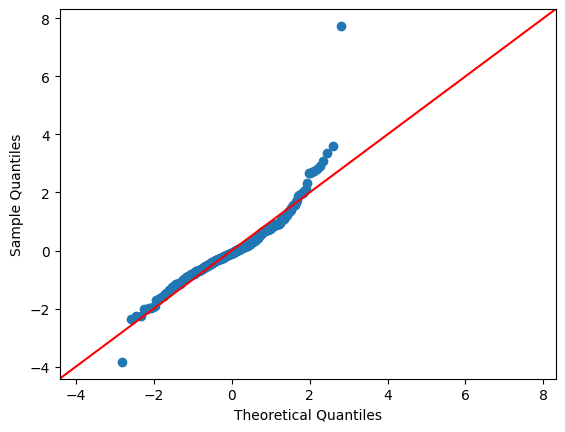

In [13]:
from statsmodels.api import qqplot

qqplot(price_vs_dist.resid, line='45', fit=True)

### Scale Location plot

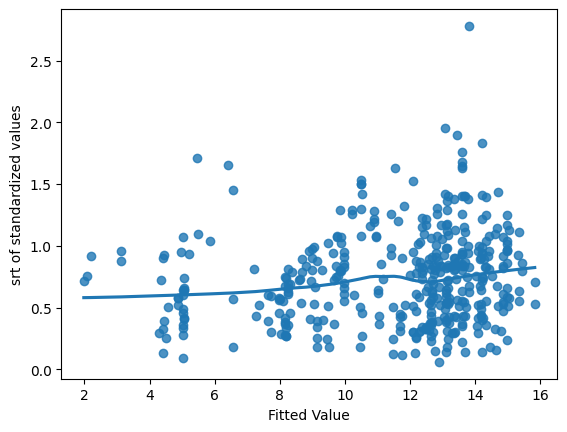

In [15]:
model_norm_residuals = price_vs_dist.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(x=price_vs_dist.fittedvalues , y=model_norm_residuals_abs_sqrt, ci=None, lowess =True)
plt.xlabel('Fitted Value')
plt.ylabel('srt of standardized values')
plt.show()